<a href="https://colab.research.google.com/github/reydrey/DSC672_Project/blob/main/dsc_672_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DSC 672 Project by Vikram Kalister and Shreyas Ravi

## Importing Packages

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

sklearn.__version__

'1.0.2'

In [2]:
!pip install pymc3==3.10
!pip install arviz==0.10
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 5.2 MB/s 
     |████████████████████████████████| 2.8 MB 41.1 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.0.11-py3-none-any.whl size=2572038 sha256=dabfd1940acc536681ea87871a95e9ce09fd6d4e0b41bb3f0c38da56cc474b81
  Stored in directory: /root/.cache/pip/wheels/45/cd/5b/6b7f84f36d564107f0786ce959bcb7641e07c764cb9abdf222
Successfully built theano-pymc
  Attempting uninstall: theano-pymc
    Found existing installation: Theano-PyMC 1.1.2
    Uninstalling Theano-PyMC-1.1.2:
      Successfully uninstalled Theano-PyMC-1.1.2
  Attempting uninstall: pymc3
    Found existing installation: pymc3 3.11.4
    Uninstalling pymc3-3.11.4:
      Successfully uninstalled pymc3-3.11.4
     |████████████████████████████████| 1.5 MB 5.2 MB/s 
  Attempting uninstall: arviz
    Found existing installation: arviz 0.12.1
    Uninstalling arviz-0.12.1:
      Successfully uninstalled arviz-0.12.1
     |████████████████████████████████| 1.9 MB 5.0 MB

In [3]:
import pymc3 as pm
import arviz as az

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [4]:
data = pd.read_csv('cardio_train-1.csv', sep = ";")

In [5]:
data.shape

(70000, 13)

In [6]:
df = data.sample(frac=0.25)

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
5516,7848,20860,1,165,66.0,120,80,1,1,0,0,1,0
56775,81049,20508,2,163,63.0,120,80,1,1,0,0,1,0
49645,70886,20591,1,160,58.0,120,80,1,1,0,0,1,1
1213,1696,18269,1,160,72.0,90,60,1,3,0,0,0,1
53987,77016,21790,1,156,64.0,130,90,1,1,0,0,1,0


In [8]:
df.shape

(17500, 13)

In [9]:
df.info()
df["age"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17500 entries, 5516 to 68927
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           17500 non-null  int64  
 1   age          17500 non-null  int64  
 2   gender       17500 non-null  int64  
 3   height       17500 non-null  int64  
 4   weight       17500 non-null  float64
 5   ap_hi        17500 non-null  int64  
 6   ap_lo        17500 non-null  int64  
 7   cholesterol  17500 non-null  int64  
 8   gluc         17500 non-null  int64  
 9   smoke        17500 non-null  int64  
 10  alco         17500 non-null  int64  
 11  active       17500 non-null  int64  
 12  cardio       17500 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 1.9 MB


5516     20860
56775    20508
49645    20591
1213     18269
53987    21790
         ...  
65041    19866
41725    21172
14601    14626
46220    19564
68927    17405
Name: age, Length: 17500, dtype: int64

In [10]:
df["Age"] = df["age"]/365
del df["age"]
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
5516,7848,1,165,66.0,120,80,1,1,0,0,1,0,57.150685
56775,81049,2,163,63.0,120,80,1,1,0,0,1,0,56.186301
49645,70886,1,160,58.0,120,80,1,1,0,0,1,1,56.413699
1213,1696,1,160,72.0,90,60,1,3,0,0,0,1,50.052055
53987,77016,1,156,64.0,130,90,1,1,0,0,1,0,59.698630


In [11]:
df['height'] = df['height']/100

In [12]:
df['height']

5516     1.65
56775    1.63
49645    1.60
1213     1.60
53987    1.56
         ... 
65041    1.48
41725    1.76
14601    1.86
46220    1.67
68927    1.61
Name: height, Length: 17500, dtype: float64

In [13]:
df['bmi'] = df['weight']/((df['height'])**2)

In [14]:
del df['weight']
del df['height']

In [15]:
df.head()

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,bmi
5516,7848,1,120,80,1,1,0,0,1,0,57.150685,24.242424
56775,81049,2,120,80,1,1,0,0,1,0,56.186301,23.711845
49645,70886,1,120,80,1,1,0,0,1,1,56.413699,22.656250
1213,1696,1,90,60,1,3,0,0,0,1,50.052055,28.125000
53987,77016,1,130,90,1,1,0,0,1,0,59.698630,26.298488


In [16]:
 # df['bmi']

In [17]:
df["age"] = df["Age"].round()
del df["Age"]
del df['id']
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
5516,1,120,80,1,1,0,0,1,0,24.242424,57.0
56775,2,120,80,1,1,0,0,1,0,23.711845,56.0
49645,1,120,80,1,1,0,0,1,1,22.656250,56.0
1213,1,90,60,1,3,0,0,0,1,28.125000,50.0
53987,1,130,90,1,1,0,0,1,0,26.298488,60.0


In [18]:
df['bmi'] = df['bmi'].round()
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
5516,1,120,80,1,1,0,0,1,0,24.0,57.0
56775,2,120,80,1,1,0,0,1,0,24.0,56.0
49645,1,120,80,1,1,0,0,1,1,23.0,56.0
1213,1,90,60,1,3,0,0,0,1,28.0,50.0
53987,1,130,90,1,1,0,0,1,0,26.0,60.0


In [19]:
df = df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]]
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
5516,1,120,80,1,1,0,0,1,0,24.0,57.0
56775,2,120,80,1,1,0,0,1,0,24.0,56.0
49645,1,120,80,1,1,0,0,1,1,23.0,56.0
1213,1,90,60,1,3,0,0,0,1,28.0,50.0
53987,1,130,90,1,1,0,0,1,0,26.0,60.0


In [20]:
scaler = MinMaxScaler()

In [21]:
df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]] = scaler.fit_transform(df[["gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
         "smoke", "alco", "active", "cardio", "bmi", "age"]])

In [22]:
df.head()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age
5516,0.0,0.014870,0.008878,0.0,0.0,0.0,0.0,1.0,0.0,0.083799,0.692308
56775,1.0,0.014870,0.008878,0.0,0.0,0.0,0.0,1.0,0.0,0.083799,0.653846
49645,0.0,0.014870,0.008878,0.0,0.0,0.0,0.0,1.0,1.0,0.078212,0.653846
1213,0.0,0.013011,0.006659,0.0,1.0,0.0,0.0,0.0,1.0,0.106145,0.423077
53987,0.0,0.015489,0.009988,0.0,0.0,0.0,0.0,1.0,0.0,0.094972,0.807692


Text(0.5, 1.0, 'Correlation Plot')

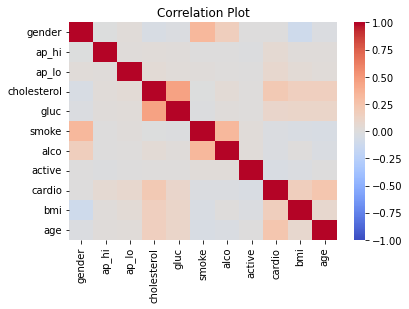

In [23]:
sns.heatmap(data = df.corr(), vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title("Correlation Plot")

Text(0.5, 1.0, 'Presence of Heart Disease based on activity')

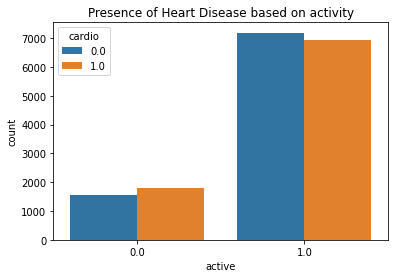

In [24]:
sns.countplot(x = "active", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on activity")

Text(0.5, 1.0, 'Presence of Heart Disease based on age')

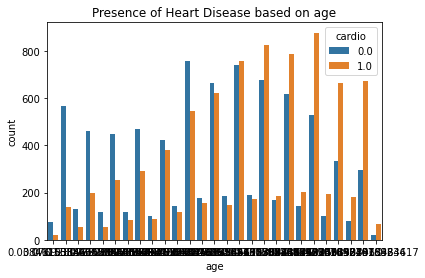

In [25]:
sns.countplot(x = "age", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on age")

Text(0.5, 1.0, 'Presence of Heart Disease based on cholesterol')

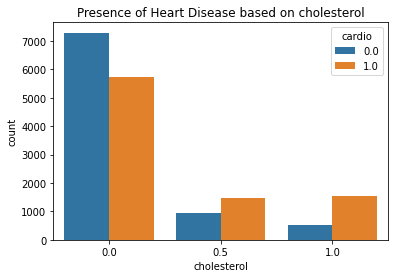

In [26]:
sns.countplot(x = "cholesterol", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on cholesterol")

In [27]:
X = df.drop("cardio", axis = 1)
y = df["cardio"]

## Multicolinearity & Feature Selection

In [28]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
X = df[list(df.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)
# High VIF indicates that there's multicollinearity

,VIF,Column
9,6.707874,bmi
10,5.019979,age
7,4.173190,active
1,3.063165,ap_hi
8,2.264592,cardio
3,1.740697,cholesterol
0,1.687478,gender
4,1.474460,gluc
2,1.420817,ap_lo
5,1.353984,smoke


## Models Used
1. Decision Trees
2. Random Forest Classifier
3. Naive Bayes
4. Support Vector Machines (SVM)
5. Support Vector Machines (PCA) **OPTIONAL**
6. Bayesian Analysis

## Preparing Data for Machine Learning

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

## Decision Trees

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [56]:
dt = DecisionTreeClassifier(random_state = 40)
dt.fit(X_train,y_train)
pred_train = dt.predict(X_train)
print("Accuracy Train", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

pred = dt.predict(X_test)
print("Accuracy Test", metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy Train 1.0
Accuracy Test 1.0


In [57]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2651
         1.0       1.00      1.00      1.00      2599

    accuracy                           1.00      5250
   macro avg       1.00      1.00      1.00      5250
weighted avg       1.00      1.00      1.00      5250



### Grid Search for Decision Trees

In [50]:
parameters = {
    "min_samples_split": [5, 10, 100, 200], 
    "max_depth": [10, 50, 100, 200]
}

In [51]:
grid = GridSearchCV(dt, parameters, cv = 3, n_jobs = -1)

In [52]:
grid.fit(X_train, y_train)
grid.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [53]:
dt = DecisionTreeClassifier(max_depth = 10, min_samples_split = 5)

In [54]:
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2651
         1.0       1.00      1.00      1.00      2599

    accuracy                           1.00      5250
   macro avg       1.00      1.00      1.00      5250
weighted avg       1.00      1.00      1.00      5250



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
RF = RandomForestClassifier()

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred = RF.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

0.9906122448979592

In [ ]:
pred_test = RF.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred_test)

0.6868571428571428

In [ ]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68      2587
         1.0       0.69      0.69      0.69      2663

    accuracy                           0.69      5250
   macro avg       0.69      0.69      0.69      5250
weighted avg       0.69      0.69      0.69      5250



### Grid Search for Random Forest Classifier

In [ ]:
parameters = {
    "min_samples_split": [100, 500, 1000, 2000], 
    "max_depth": [10, 50, 100, 200], 
    "n_estimators": [100, 500, 1000]
}

In [ ]:
grid = GridSearchCV(RF, parameters, cv = 3, n_jobs = -1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, 200],
                         'min_samples_split': [100, 500, 1000, 2000],
                         'n_estimators': [100, 500, 1000]})

In [ ]:
grid.best_estimator_

RandomForestClassifier(max_depth=50, min_samples_split=100, n_estimators=1000)

In [ ]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=100, n_estimators=1000)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=100)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, rf_pred))

[[1966  621]
 [ 817 1846]]


In [ ]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       0.71      0.76      0.73      2587
         1.0       0.75      0.69      0.72      2663

    accuracy                           0.73      5250
   macro avg       0.73      0.73      0.73      5250
weighted avg       0.73      0.73      0.73      5250



## Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
g = GaussianNB()

In [61]:
g.fit(X_train, y_train)

GaussianNB()

In [62]:
pred = g.predict(X_train)
metrics.accuracy_score(y_train, pred)

1.0

In [63]:
pred = g.predict(X_test)
metrics.accuracy_score(y_test, pred)

1.0

In [64]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2651
         1.0       1.00      1.00      1.00      2599

    accuracy                           1.00      5250
   macro avg       1.00      1.00      1.00      5250
weighted avg       1.00      1.00      1.00      5250



### Grid Search for Naive Bayes

In [65]:
g.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [68]:
parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [69]:
gCV = GridSearchCV(g, parameters, cv = 3, n_jobs = -1)

In [70]:
gCV.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [76]:
g = GaussianNB(var_smoothing = 4.32876128e-09)

In [77]:
g.fit(X_train, y_train)

GaussianNB(var_smoothing=4.32876128e-09)

In [78]:
gPred = g.predict(X_test)

In [79]:
print(metrics.classification_report(y_test, gPred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2651
         1.0       1.00      1.00      1.00      2599

    accuracy                           1.00      5250
   macro avg       1.00      1.00      1.00      5250
weighted avg       1.00      1.00      1.00      5250



## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
estimator = SVC(kernel ='rbf')

In [ ]:
estimator.fit(X_train,y_train)

SVC()

In [ ]:
pred = estimator.predict(X_train)

In [ ]:
svm = metrics.accuracy_score(y_train,pred)

In [ ]:
svm_pred2 = estimator.predict(X_test)

In [ ]:
svm1 = metrics.accuracy_score(y_test,svm_pred2)

In [ ]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

Training Accuracy: 0.6384489795918368
Testing Accuracy: 0.6245714285714286


In [ ]:
print(metrics.classification_report(y_test, svm_pred2))

              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64      2587
         1.0       0.65      0.57      0.61      2663

    accuracy                           0.62      5250
   macro avg       0.63      0.63      0.62      5250
weighted avg       0.63      0.62      0.62      5250



### Grid Search for Support Vector Machines

In [ ]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000]
}

In [ ]:
cv_1 = GridSearchCV(estimator, parameters, cv=3, n_jobs=-1)

In [ ]:
cv_1.fit(X_train, y_train)

/Users/shreyasravi/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']})

In [ ]:
cv_1.best_estimator_

SVC(C=1000, kernel='linear')

In [ ]:
svc = SVC(C=1000, kernel='linear')

In [ ]:
svc.fit(X_train, y_train)

SVC(C=1000, kernel='linear')

In [ ]:
svc_pred = svc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, svc_pred))

[[2013  574]
 [ 997 1666]]


In [ ]:
print(metrics.classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72      2587
         1.0       0.74      0.63      0.68      2663

    accuracy                           0.70      5250
   macro avg       0.71      0.70      0.70      5250
weighted avg       0.71      0.70      0.70      5250



## Support Vector Machines (PCA) **OPTIONAL**



### Grid Search for Support Vector Machines (PCA) **OPTIONAL**

## Final Data Visualizations